In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import numpy as np
import regex as re
import pandas as pd

In [30]:
songs = pd.read_csv('/content/lany.csv')
songs.head()


,Song,Lyrics
0,Malibu Nights,"There's no reason, there's no rhyme I found my..."
1,"""13""","It could change but this feels like, like the ..."
2,LYSB,Ain't never felt this way Can't get enough so ...
3,Thick And Thin,Late night Your eyes fell to the floor I'm try...
4,Mean It,"Small talk, no conversation That look makes me..."


In [31]:
print("Number of records: ", songs.shape[0])
print("Number of fields: ", songs.shape[1])

Number of records:  9
Number of fields:  2


In [32]:
songs['Lyrics']

0    There's no reason, there's no rhyme I found my...
1    It could change but this feels like, like the ...
2    Ain't never felt this way Can't get enough so ...
3    Late night Your eyes fell to the floor I'm try...
4    Small talk, no conversation That look makes me...
5    I'm falling out of love with you LA Running ou...
6    Thrift store fashion imperfect tattoos Taking ...
7    My reputation says that I fall too fast They t...
8    Chasing a heart is like chasing a ghost You ca...
Name: Lyrics, dtype: object

In [33]:
songs['Lyrics'] = songs['Lyrics'].apply(lambda x: x.replace(u'\xa0',u' '))
songs['Lyrics'] = songs['Lyrics'].apply(lambda x: x.replace('\u200a',' '))

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(songs['Lyrics'])
total_words = len(tokenizer.word_index) + 1
print("Total number of words: ", total_words)

Total number of words:  469


In [35]:
# Create input sequences
input_sequences = []
for line in songs['Lyrics']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))
# create features and label
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Convert target data to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [39]:
model = Sequential()
model.add(Embedding(total_words, 10,
                    input_length=max_sequence_len-1))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [40]:
his = model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
92/92 [==============================] - 67s 698ms/step - loss: 5.6529 - accuracy: 0.0391
Epoch 2/50
92/92 [==============================] - 66s 716ms/step - loss: 5.3662 - accuracy: 0.0435
Epoch 3/50
92/92 [==============================] - 64s 698ms/step - loss: 5.3354 - accuracy: 0.0405
Epoch 4/50
92/92 [==============================] - 63s 688ms/step - loss: 5.3616 - accuracy: 0.0418
Epoch 5/50
92/92 [==============================] - 64s 693ms/step - loss: 5.1897 - accuracy: 0.0445
Epoch 6/50
92/92 [==============================] - 67s 731ms/step - loss: 5.0267 - accuracy: 0.0500
Epoch 7/50
92/92 [==============================] - 63s 684ms/step - loss: 4.8557 - accuracy: 0.0639
Epoch 8/50
92/92 [==============================] - 64s 701ms/step - loss: 4.6496 - accuracy: 0.0847
Epoch 9/50
92/92 [==============================] - 63s 690ms/step - loss: 4.4319 - accuracy: 0.1183
Epoch 10/50
92/92 [==============================] - 64s 687ms/step - loss: 4.2029 - accura

In [41]:
import matplotlib.pyplot as plt

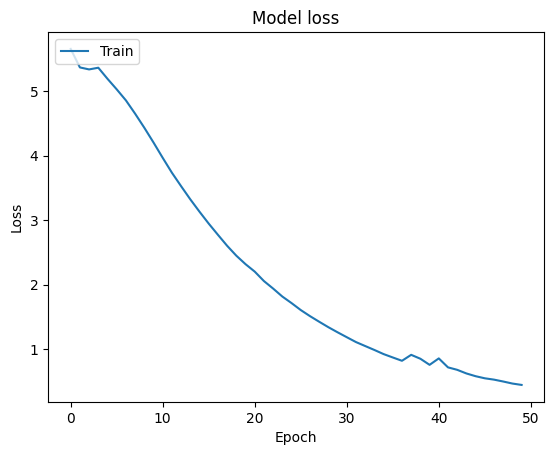

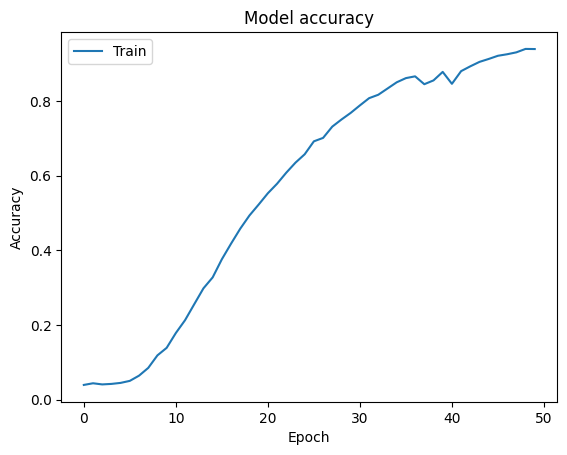

In [42]:
plt.plot(his.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(his.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [44]:
seed_text = "Up all night on my mind got me thinking "
next_words = 8

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 104ms/step
Next predicted words: Up all night on my mind got me thinking  the own phone is quiet walls town bare
